## Q24 伽马矫正

[参考](https://blog.csdn.net/akadiao/article/details/79679306)

gamma矫正通常用于电视和监视器系统中重现摄像机拍摄的画面．在图像处理中也可用于调节图像的对比度，减少图像的光照不均和局部阴影

> * 我们的图像像素强度必须从[0,255]到[0,1.0]的范围缩放
> * Gamma值<1将使图像向光谱的较暗端移动，而gamma值> 1将使图像看起来更亮。 伽玛值G = 1对输入图像没有影响：

gamma矫正公式：

$$
f(x)=c * x^{1/\gamma}
$$

即输出是输入的幂函数，指数为γ．

当γ取不同的值时对应的输入输出曲线( γ=1时输入输出保持一致)

$$
I_{out} = (1/c * I_{in}) ^ {(1/\gamma)}
$$

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

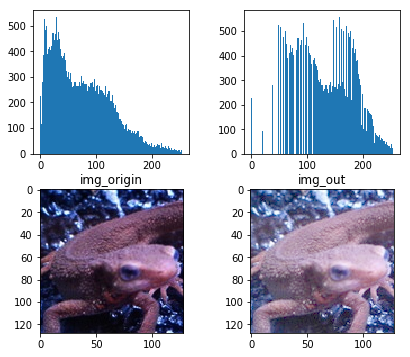

In [4]:
img = cv2.imread("gg_gamma.jpg")
img_origin = img.copy()

# 除以像素最大值先将图像像素值调整到0-1之间
img = img / 255.

c = 1.
gamma = 2.2

out = ((1./c) * img) ** (1/gamma)

out = out * 255.

img_out = out.astype(np.uint8)

img_origin = cv2.cvtColor(img_origin, cv2.COLOR_BGR2RGB)
img_out = cv2.cvtColor(img_out, cv2.COLOR_BGR2RGB)

plt.figure()
plt.subplot(221)
plt.hist(img_origin.ravel(), bins=255, rwidth=1, range=(0, 255))
plt.subplot(222)
plt.hist(img_out.ravel(), bins=255, rwidth=1, range=(0, 255))
plt.subplot(223)
plt.imshow(img_origin)
plt.title("img_origin")
plt.subplot(224)
plt.imshow(img_out)
plt.title("img_out")

# Adjust the subplot layout, because the logit one may take more space
plt.subplots_adjust(top=1.2, bottom=0.08, left=0.10, right=0.95, hspace=0.25, wspace=0.35)
plt.show()